In [1]:
#import all of the modules that you will use for this notebook. If there is a problem here, the modules have not been installed properly in your conda environment.
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
#Now, we want to import our data.For this we use a nice for loop over multiple files that we are importing.
#Import mobsuite results from the genomes and combine into one big table.
from pathlib import Path
#create an empty dataframe
all_mobsuite_results = []
#Determine the path that will lead to your mobsuite results files for all HLF genomes
mobsuite_results_directory = "/home/haley/Desktop/Comp_Sci_and_Programming_Workshops/Python_Workshop_3/"
for mobsuite_output in Path(mobsuite_results_directory).glob('*/*/annotation/mob_recon/*_mob_recon/mobtyper_results.txt'):

    Plasmid_name = mobsuite_output.parts[6]

    print(f"Parsing {mobsuite_output}")
#Read tables in mobsuite output files with new header we designate
    Plasmid_mobsuite_results = pd.read_table(mobsuite_output, 
                                       sep='\t', 
                                       header=0, 
                                       names=['sample_id', 'num_contigs', 'size', 'gc', 'md5', 'rep_type(s)', 'rep_type_accession(s)','relaxase_type(s)', 'relaxase_type_accession(s)', 'mpf_type', 'mpf_type_accession(s)', 'orit_type(s)', 'orit_accession(s)', 'predicted_mobility', 'mash_nearest_neighbor', 'mash_neighbor_distance', 'mash_neighbor_identification', 'primary_cluster_id', 'secondary_cluster_id', 'predicted_host_range_overall_rank', 'predicted_host_range_overall_name', 'observed_host_range_ncbi_rank', 'observed_host_range_ncbi_name', 'reported_host_range_lit_rank', 'reported_host_range_lit_name', 'associated_pmid(s)'], 
                                            usecols=['sample_id', 'num_contigs', 'size', 'gc', 'md5', 'rep_type(s)', 'rep_type_accession(s)','relaxase_type(s)', 'relaxase_type_accession(s)', 'mpf_type', 'mpf_type_accession(s)', 'orit_type(s)', 'orit_accession(s)', 'predicted_mobility', 'mash_nearest_neighbor', 'mash_neighbor_distance', 'mash_neighbor_identification', 'primary_cluster_id', 'secondary_cluster_id', 'predicted_host_range_overall_rank', 'predicted_host_range_overall_name', 'observed_host_range_ncbi_rank', 'observed_host_range_ncbi_name', 'reported_host_range_lit_rank', 'reported_host_range_lit_name', 'associated_pmid(s)'])
#Put Plasmid_name (the name of the isolate) into a column in the table
    Plasmid_mobsuite_results['Plasmid_Pathname'] = Plasmid_name
#Append the table to your empty dataframe
    all_mobsuite_results.append(Plasmid_mobsuite_results)
#concatentate all the tables together
all_mobsuite_results = pd.concat(all_mobsuite_results)
#Print to see new table
print(all_mobsuite_results)

Parsing /home/haley/Desktop/Comp_Sci_and_Programming_Workshops/Python_Workshop_3/EC_23315_C1_H/GCA_027275625.1_ASM2727562v1/annotation/mob_recon/GCA_027275625.1_ASM2727562v1_mob_recon/mobtyper_results.txt
Parsing /home/haley/Desktop/Comp_Sci_and_Programming_Workshops/Python_Workshop_3/EC_2655_1L3_D/GCA_027274745.1_ASM2727474v1/annotation/mob_recon/GCA_027274745.1_ASM2727474v1_mob_recon/mobtyper_results.txt
Parsing /home/haley/Desktop/Comp_Sci_and_Programming_Workshops/Python_Workshop_3/EC_0012_1H1_D/GCA_027275285.1_ASM2727528v1/annotation/mob_recon/GCA_027275285.1_ASM2727528v1_mob_recon/mobtyper_results.txt
Parsing /home/haley/Desktop/Comp_Sci_and_Programming_Workshops/Python_Workshop_3/EC_0038_1H1_D/GCA_027275735.1_ASM2727573v1/annotation/mob_recon/GCA_027275735.1_ASM2727573v1_mob_recon/mobtyper_results.txt
Parsing /home/haley/Desktop/Comp_Sci_and_Programming_Workshops/Python_Workshop_3/EC_0205_C3_H/GCA_027271465.1_ASM2727146v1/annotation/mob_recon/GCA_027271465.1_ASM2727146v1_mob_rec

In [9]:
#View the first 5 lines of the dataframe you just created with all your results to see that the formatting is correct.
all_mobsuite_results.head()

,sample_id,num_contigs,size,gc,md5,rep_type(s),rep_type_accession(s),relaxase_type(s),relaxase_type_accession(s),mpf_type,...,primary_cluster_id,secondary_cluster_id,predicted_host_range_overall_rank,predicted_host_range_overall_name,observed_host_range_ncbi_rank,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s),Plasmid_Pathname
0,GCA_027275625.1_ASM2727562v1:AA152,1,4281,43.541229,bebc03d7818cbd577e7dac7aa918b1fb,rep_cluster_2350,CP041342_00001,MOBP,NC_017321_00002,-,...,AA152,AH792,multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",genus,Escherichia,6263753; 17122402; 26802429,EC_23315_C1_H
1,GCA_027275625.1_ASM2727562v1:AB445,1,4107,46.652057,0bfb735c736572a0abfb47c207975f5b,rep_cluster_2350,CP041342_00001,MOBP,NC_017321_00002,-,...,AB445,AK229,multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",genus,Escherichia,6263753; 17122402; 26802429,EC_23315_C1_H
2,GCA_027275625.1_ASM2727562v1:AA329,2,71122,50.828154,a960fbb6a5805e669b7cda2a7831e1fc,IncFIA,000136__AP014877_00014,MOBF,NC_017627_00068,MPF_F,...,AA329,-,order,Enterobacterales,order,Enterobacterales,order,Enterobacterales,10773089; 25389419; 19897651; 24247128; 208518...,EC_23315_C1_H
3,GCA_027275625.1_ASM2727562v1:AC748,1,2089,47.103877,44b6ff78a213822d26ca14e0bffde237,Col(BS512),NC_010656,-,-,-,...,AC748,AM073,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-,EC_23315_C1_H
4,GCA_027275625.1_ASM2727562v1:AA378,2,90553,47.297163,00845f1b13295f478d049d2979c7557a,IncHI1B,000138__CP021336_00001,-,-,-,...,AA378,-,order,Enterobacterales,order,Enterobacterales,genus,Salmonella,18606786,EC_23315_C1_H


In [10]:
#You want to look at the sample_ids separate from the isolate/genome ID
#split sample_id to isolate and plasmid cluster ID in seperate columns and replace sample_id with just the plasmid cluster id
sample_id = all_mobsuite_results['sample_id']
sample_id2= [x.split(':')[1] for x in sample_id]
all_mobsuite_results['sample_id'] = sample_id2
all_mobsuite_results
#set index as the isolate names
all_mobsuite_results_index = all_mobsuite_results.set_index('Plasmid_Pathname')
all_mobsuite_results.head()

,sample_id,num_contigs,size,gc,md5,rep_type(s),rep_type_accession(s),relaxase_type(s),relaxase_type_accession(s),mpf_type,...,primary_cluster_id,secondary_cluster_id,predicted_host_range_overall_rank,predicted_host_range_overall_name,observed_host_range_ncbi_rank,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s),Plasmid_Pathname
0,AA152,1,4281,43.541229,bebc03d7818cbd577e7dac7aa918b1fb,rep_cluster_2350,CP041342_00001,MOBP,NC_017321_00002,-,...,AA152,AH792,multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",genus,Escherichia,6263753; 17122402; 26802429,EC_23315_C1_H
1,AB445,1,4107,46.652057,0bfb735c736572a0abfb47c207975f5b,rep_cluster_2350,CP041342_00001,MOBP,NC_017321_00002,-,...,AB445,AK229,multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",genus,Escherichia,6263753; 17122402; 26802429,EC_23315_C1_H
2,AA329,2,71122,50.828154,a960fbb6a5805e669b7cda2a7831e1fc,IncFIA,000136__AP014877_00014,MOBF,NC_017627_00068,MPF_F,...,AA329,-,order,Enterobacterales,order,Enterobacterales,order,Enterobacterales,10773089; 25389419; 19897651; 24247128; 208518...,EC_23315_C1_H
3,AC748,1,2089,47.103877,44b6ff78a213822d26ca14e0bffde237,Col(BS512),NC_010656,-,-,-,...,AC748,AM073,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-,EC_23315_C1_H
4,AA378,2,90553,47.297163,00845f1b13295f478d049d2979c7557a,IncHI1B,000138__CP021336_00001,-,-,-,...,AA378,-,order,Enterobacterales,order,Enterobacterales,genus,Salmonella,18606786,EC_23315_C1_H


In [12]:
#sort the dataframe by the index
all_mobsuite_results_sorted = all_mobsuite_results_index.sort_index()
#View the dataframe to make sure it is ordered correctly
all_mobsuite_results_sorted

,sample_id,num_contigs,size,gc,md5,rep_type(s),rep_type_accession(s),relaxase_type(s),relaxase_type_accession(s),mpf_type,...,mash_neighbor_identification,primary_cluster_id,secondary_cluster_id,predicted_host_range_overall_rank,predicted_host_range_overall_name,observed_host_range_ncbi_rank,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s)
Plasmid_Pathname,,,,,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,AC509,1,13263,48.639071,5b4f3ad6edcedb6905d7b1baef091751,rep_cluster_2350,CP035723_00002,"MOBP,MOBP,MOBP","NC_019076_00002,CP043517_00004,NC_017321_00002",-,...,Escherichia coli,AC509,AL724,multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",genus,Escherichia,6263753; 17122402; 26802429
EC_0012_1H1_D,AA176,1,122464,49.792592,bae7b31a92e73259a9fdce9386cf720c,"IncFIB,rep_cluster_2244","000095__NZ_CP014273_00094,CP033091_00053",MOBF,NC_017627_00068,MPF_F,...,Escherichia coli DSM 30083 = JCM 1649 = ATCC 1...,AA176,AH856,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
EC_0038_1H1_D,AA176,1,128874,49.112311,9da28a95bb0ab0a30f343f379defb736,"IncFIB,rep_cluster_2244","000096__NC_019117_00097,CP033091_00053","MOBF,MOBF","CP029214_00066,NC_011964_00125",MPF_F,...,Escherichia coli DSM 30083 = JCM 1649 = ATCC 1...,AA176,AH856,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
EC_0205_C3_H,AA378,1,95774,47.618352,561274a948de536871973c0452d9a733,IncHI1B,000138__CP021336_00001,-,-,-,...,Escherichia coli,AA378,-,order,Enterobacterales,order,Enterobacterales,genus,Salmonella,18606786
EC_0205_C3_H,AC748,1,2089,47.199617,506032985d6497c60cd41f6002e4b82f,Col(BS512),NC_010656,-,-,-,...,Escherichia coli,AC748,AM073,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
EC_0205_C3_H,AA329,1,70710,52.225993,e652e749744c1ab95d63ed805bbcad4a,"IncFIA,IncFIC","000136__AP014877_00014,CP003035",MOBF,NC_017627_00068,MPF_F,...,Escherichia coli O26:H11 str. 11368,AA329,AI236,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
EC_0731_SB2C1_H,AB443,1,6273,46.564642,37adbc8f8743bebcd20d10bd28c4ca78,rep_cluster_2350,CP041342_00001,"MOBP,MOBP,MOBP","NC_019076_00002,NC_017321_00002,NC_022662_00003",-,...,Escherichia coli,AB443,AK226,multi-phylla,"Actinobacteria,Proteobacteria,Bacteroidetes,Fi...",multi-phylla,"Actinobacteria,Proteobacteria,Bacteroidetes,Fi...",genus,Escherichia,6263753; 17122402; 26802429
EC_0731_SB2C1_H,AA176,2,211760,49.758217,93d1ff7091ade4581978f670ff78dd33,"IncFIA,IncFIB,IncFIC,rep_cluster_2244","CP019055_00116,000095__NZ_CP014273_00094,AP001...","MOBF,MOBP","NC_017627_00068,NC_021819_00066",MPF_F,...,Escherichia coli,AA176,AH853,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
EC_23315_C1_H,AA152,1,4281,43.541229,bebc03d7818cbd577e7dac7aa918b1fb,rep_cluster_2350,CP041342_00001,MOBP,NC_017321_00002,-,...,Escherichia coli O26:H11 str. 11368,AA152,AH792,multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",genus,Escherichia,6263753; 17122402; 26802429


In [13]:
#save the dataframe for later use. This will save the dataframe as a csv file in your working directory
all_mobsuite_results_sorted.to_csv("EcoliARETE_Plasmids_Isolates_All_mobsuite_results.csv")

In [14]:
#Remoce all plasmid cludter IDs with "novel" in its name because these may not be plasmids and don't match any knwown plasmids.
nonovel = all_mobsuite_results_sorted[ all_mobsuite_results_sorted[ "sample_id" ].str.contains( "novel" )==False ]

In [16]:
#Make a crosstab which shows how many of each plasmid cluster is in each isolate and provides totals
plasmidisolatecrosstabnonovel = pd.crosstab(nonovel.index, nonovel.sample_id, margins=True)
plasmidisolatecrosstabnonovel

sample_id,AA152,AA175,AA176,AA314,AA315,AA329,AA378,AA668,AB062,AB241,AB443,AB445,AB685,AB690,AC509,AC748,All
row_0,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2
EC_0038_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
EC_0205_C3_H,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,3
EC_0731_SB2C1_H,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2
EC_23315_C1_H,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,5
EC_2655_1L3_D,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,4
EC_E1F_1_E,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,5
EC_E4F_1_E,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
EC_E5BF_2_E,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


In [20]:
#get the sums of all the non-novel plasmids in the isolates and make the output a dataframe
nonovelsums = plasmidisolatecrosstabnonovel['All']
nonoveldf = pd.DataFrame(nonovelsums)
nonoveldf

,All
row_0,
EC_0012_1H1_D,2
EC_0038_1H1_D,1
EC_0205_C3_H,3
EC_0731_SB2C1_H,2
EC_23315_C1_H,5
EC_2655_1L3_D,4
EC_E1F_1_E,5
EC_E4F_1_E,1
EC_E5BF_2_E,2


In [21]:
#save the sums of non-novel plasmid clusters as a csv in your working directory
nonoveldf.to_csv("EcoliARETE_Plasmids_Isolates_All_no_novel_mobsuite_results_SUMS.csv")

In [40]:
#Use the crosstab to get the total number of each plasmid cluster detected in our genomes.
mPA= plasmidisolatecrosstabnonovel.sum(axis = 0)
PA2 = pd.DataFrame(data=mPA)
PA3 = PA2.reset_index()
PA3.columns = ['Plasmid_Cluster', 'Total']
PA4 = PA3.sort_values("Total")
PA5 = PA4.drop([16],axis=0)

In [41]:
PA5

,Plasmid_Cluster,Total
0,AA152,2
14,AC509,2
13,AB690,2
11,AB445,2
9,AB241,2
7,AA668,2
8,AB062,2
4,AA315,2
3,AA314,2
1,AA175,2


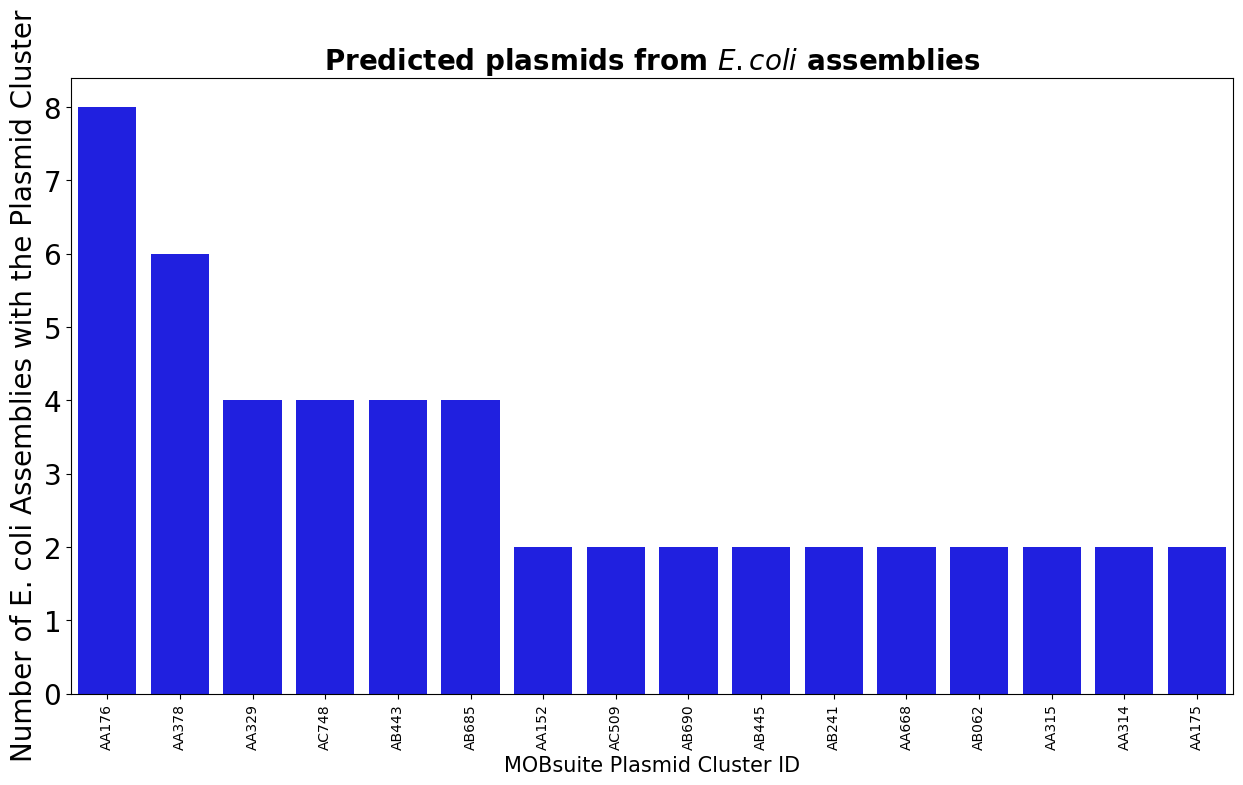

In [42]:
#Make a plot of how many genomes have each of the plasmid cluster
#define size of figure
plot.figure(figsize = (15,8))
#create teh barplot using seaborn
ax = sns.barplot(data=PA5, x="Plasmid_Cluster", y="Total", color= 'b', order=PA5.sort_values(by='Total', ascending=False).Plasmid_Cluster)
#set the x-axis tick labels and thier rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#Name the plot with matplotlib
plot.title(r'Predicted plasmids from $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
#Put an x-axis label with matplotlib
plot.xlabel("MOBsuite Plasmid Cluster ID",fontsize = 15)
#Put a y-axis label with matplotlib
plot.ylabel("Number of E. coli Assemblies with the Plasmid Cluster",fontsize = 20)
#set the sixe of x and y tick labels using matplotlib
plot.xticks(fontsize= 10)
plot.yticks(fontsize= 20)
#Save the figure as a PNG file with a dpi of 400 in your working directory
plot.savefig("EcoliPlasmidDetection_plasmidbarplotallassemblies.png", dpi=400, bbox_inches="tight")

In [79]:
#take the sums of plasmid clusters per genome dataframe and reset the index
nonoveldf
nonoveldfreset=nonoveldf.reset_index()

In [80]:
#Split the isolate names and take the last portion divided from the rest of the name by "_" and put it in a new column names "Source"
nonoveldfreset["Source"]=nonoveldfreset['row_0'].str.split('_').str[-1]
nonoveldfreset

,row_0,All,Source
0,EC_0012_1H1_D,2,D
1,EC_0038_1H1_D,1,D
2,EC_0205_C3_H,3,H
3,EC_0731_SB2C1_H,2,H
4,EC_23315_C1_H,5,H
5,EC_2655_1L3_D,4,D
6,EC_E1F_1_E,5,E
7,EC_E4F_1_E,1,E
8,EC_E5BF_2_E,2,E
9,All,25,All


In [81]:
#Replace the letter in column Source with the full name of the source
nonoveldfreset['Source'] = nonoveldfreset['Source'].replace({'D':'Diseased', 'H':'Cecal', 'E':'Environmental'})
nonoveluse = nonoveldfreset.drop(nonoveldfreset.index[len(nonoveldfreset)-1])
nonoveluse

,row_0,All,Source
0,EC_0012_1H1_D,2,Diseased
1,EC_0038_1H1_D,1,Diseased
2,EC_0205_C3_H,3,Cecal
3,EC_0731_SB2C1_H,2,Cecal
4,EC_23315_C1_H,5,Cecal
5,EC_2655_1L3_D,4,Diseased
6,EC_E1F_1_E,5,Environmental
7,EC_E4F_1_E,1,Environmental
8,EC_E5BF_2_E,2,Environmental


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:4.676e-01 t=-8.018e-01
Cecal vs. Environmental: t-test independent samples, P_val:6.779e-01 t=4.472e-01
Diseased vs. Environmental: t-test independent samples, P_val:8.340e-01 t=-2.236e-01


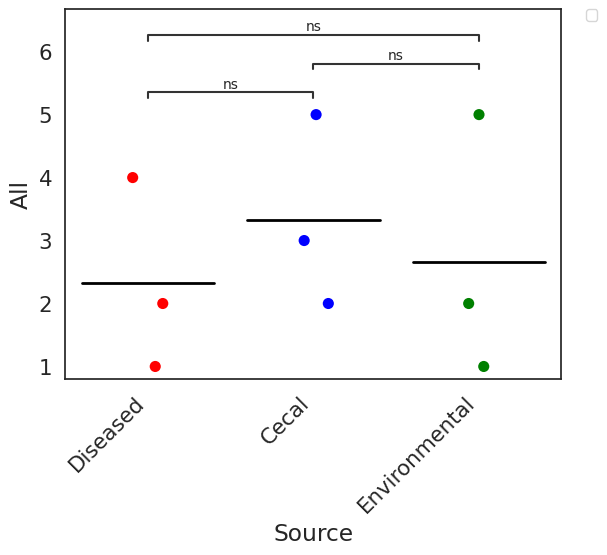

In [69]:
#create a graph showing the total number of plasmid cluster detected in each genome classified by thier source and see if there is a significant difference between the totals and sources.
#make a list called pairs which shows the comparisons that you want to make.
pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
#Set the x-axis ticks
states_subcat =['Diseased', 'Cecal', 'Environmental']

#set the style and color palette for the figure
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new stripplot with the parameters in hue_plot_params 
    hue_plot_params = {'data': nonoveluse, 'x': 'Source', 'y': 'All', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="All", data=nonoveluse, size=8, order=states_subcat, palette=['red','blue', 'green'])
plot.xticks(rotation=45, ha="right")


# plot the mean line using a boxplot
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="All",
            data=nonoveluse,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
#create a legend
handles, labels = ax.get_legend_handles_labels()
l = plot.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs and doing comparisons between sources with independent t-tests
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
#save the figure as a PNG in the working directory
plot.savefig("EcoliARETE_sumofplasmidvssource.png", dpi = 400, bbox_inches= "tight")

In [70]:
#Go back to your crosstab
plasmidisolatecrosstabnonovel.head()

sample_id,AA152,AA175,AA176,AA314,AA315,AA329,AA378,AA668,AB062,AB241,AB443,AB445,AB685,AB690,AC509,AC748,All
row_0,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2
EC_0038_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
EC_0205_C3_H,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,3
EC_0731_SB2C1_H,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2
EC_23315_C1_H,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,5


In [74]:
#split the isolate name to define the sources in a new column
plasmidisolatecrosstabnonovel["Source"]=plasmidisolatecrosstabnonovel.index.str.split('_').str[-1]
plasmidisolatecrosstabnonovel

sample_id,AA152,AA175,AA176,AA314,AA315,AA329,AA378,AA668,AB062,AB241,AB443,AB445,AB685,AB690,AC509,AC748,All,Source
row_0,,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,D
EC_0038_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D
EC_0205_C3_H,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,3,H
EC_0731_SB2C1_H,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,H
EC_23315_C1_H,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,5,H
EC_2655_1L3_D,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,4,D
EC_E1F_1_E,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,5,E
EC_E4F_1_E,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,E
EC_E5BF_2_E,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,E


In [75]:
#Put the full names of the sources in the Sources column
plasmidisolatecrosstabnonovel['Source'] = plasmidisolatecrosstabnonovel['Source'].replace({'D':'Diseased', 'H':'Cecal', 'E':'Environmental'})
nonovelcrosstabuse = plasmidisolatecrosstabnonovel.drop(plasmidisolatecrosstabnonovel.index[len(plasmidisolatecrosstabnonovel)-1])
nonovelcrosstabuse

sample_id,AA152,AA175,AA176,AA314,AA315,AA329,AA378,AA668,AB062,AB241,AB443,AB445,AB685,AB690,AC509,AC748,All,Source
row_0,,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,Diseased
EC_0038_1H1_D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Diseased
EC_0205_C3_H,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,3,Cecal
EC_0731_SB2C1_H,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,Cecal
EC_23315_C1_H,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,5,Cecal
EC_2655_1L3_D,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,4,Diseased
EC_E1F_1_E,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,5,Environmental
EC_E4F_1_E,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Environmental
EC_E5BF_2_E,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,Environmental


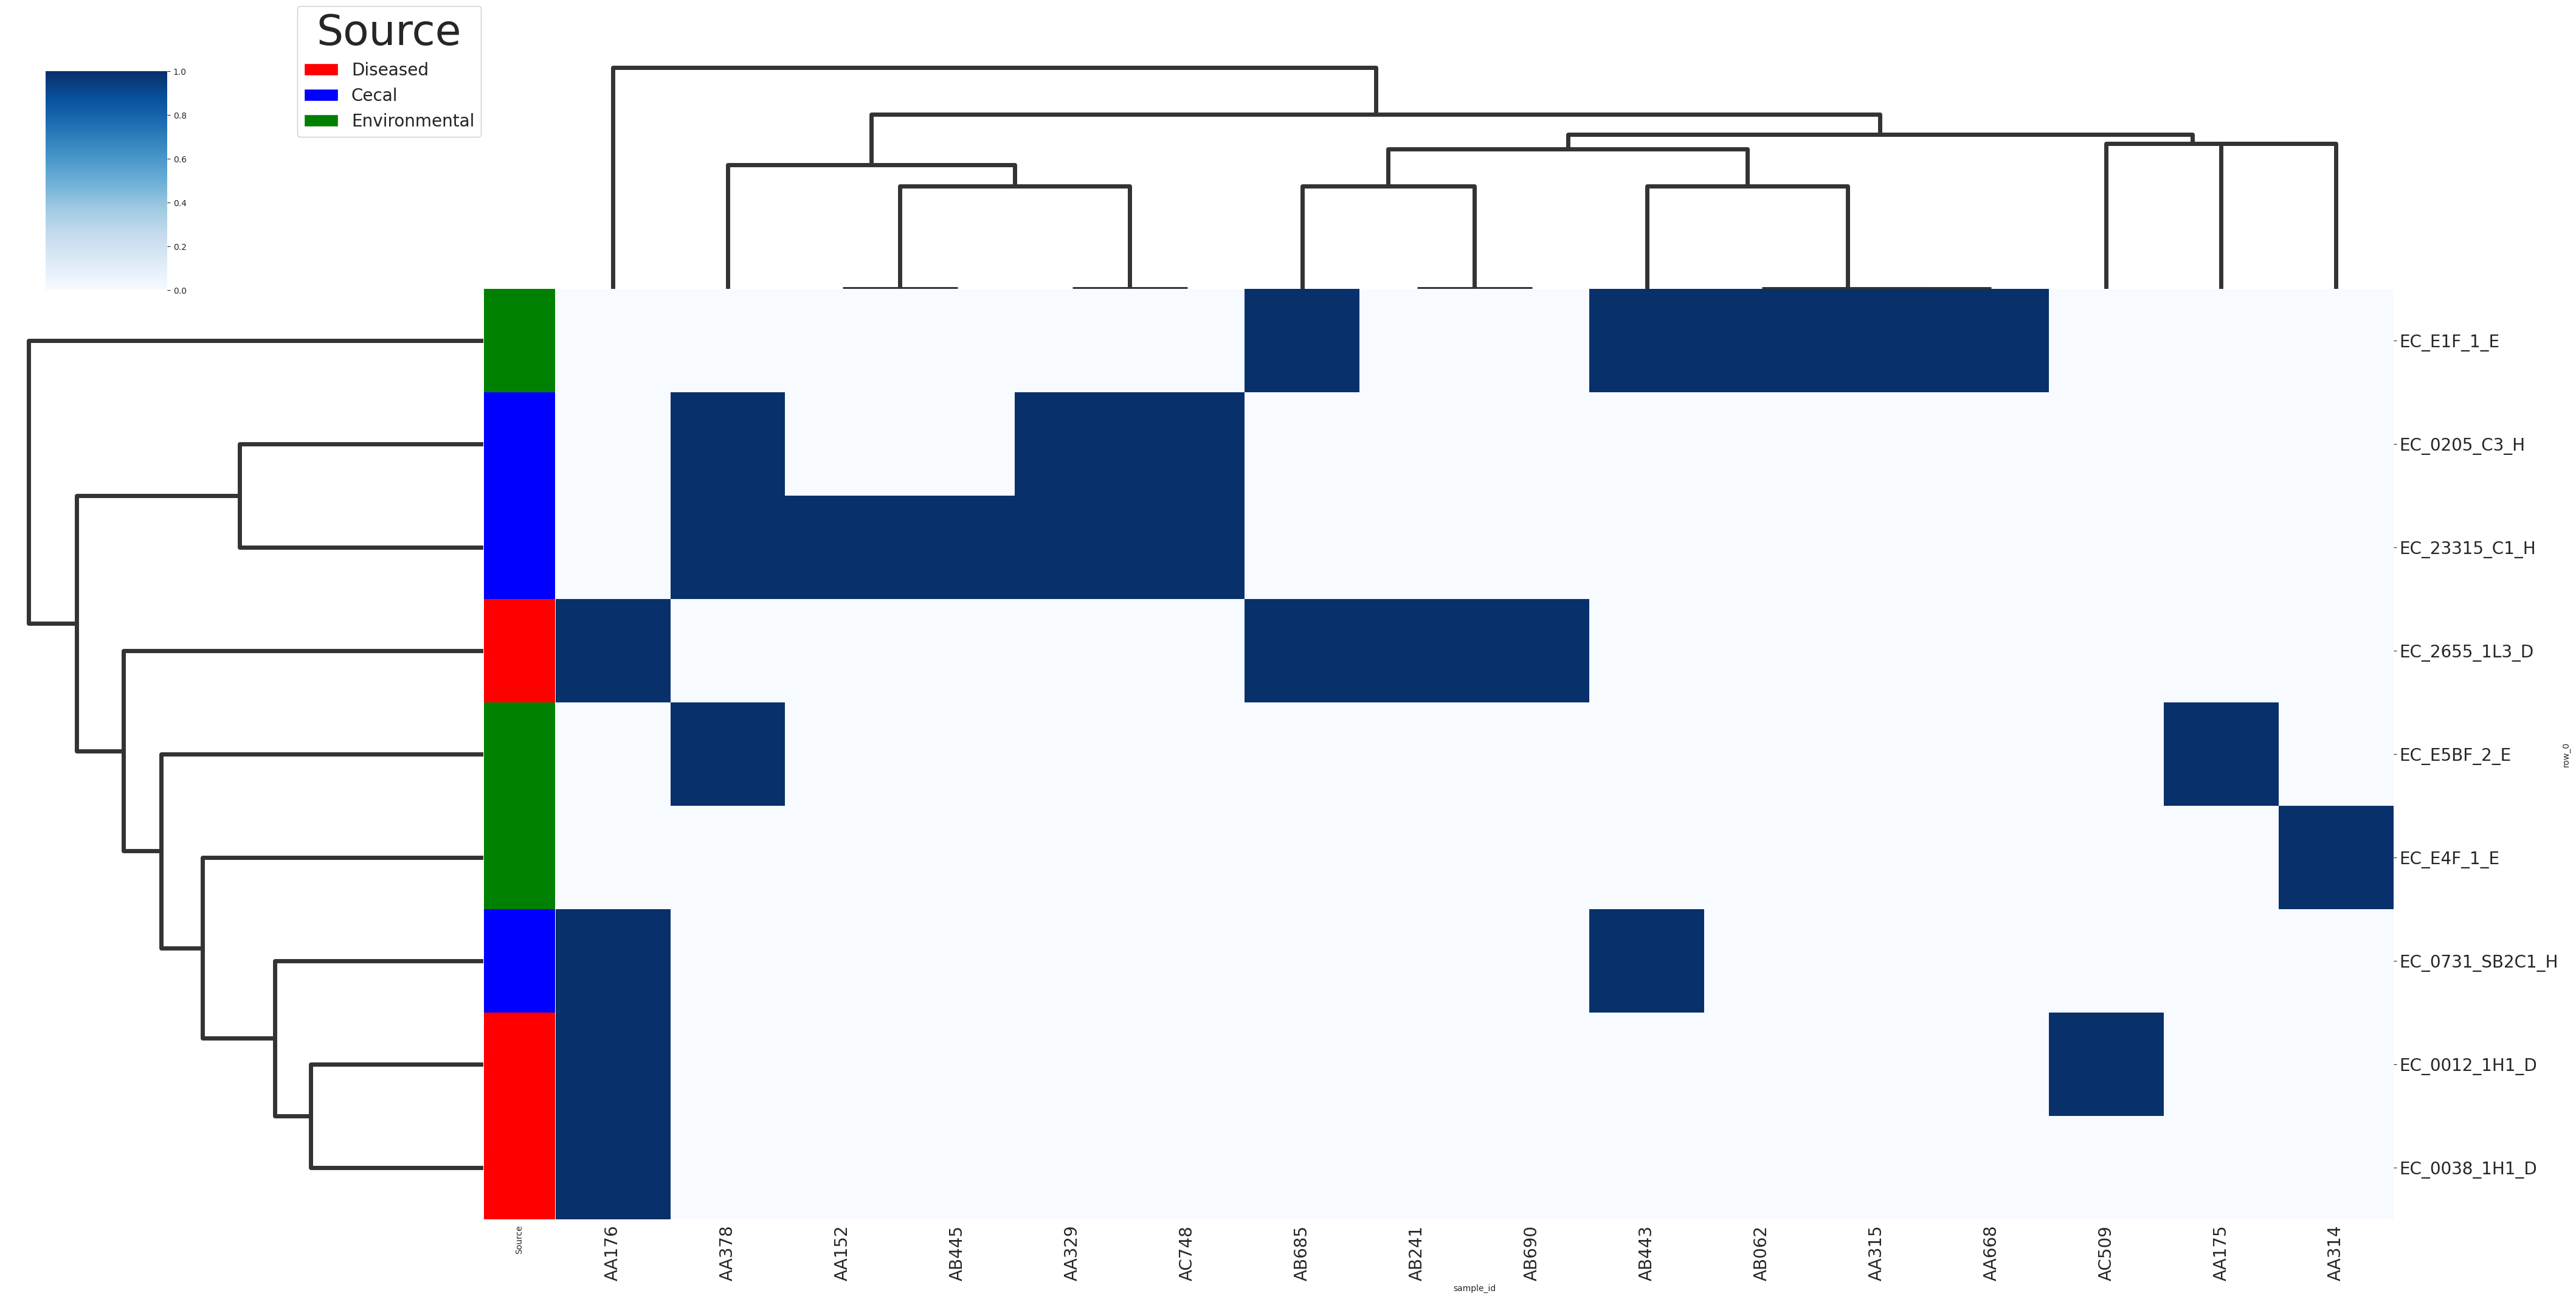

In [78]:
#Plasmid Clustermap
#make the clustermap
#import what you need
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

#Make a varaiable that has all the numerical columns in the crosstab
NUMERICAL_COLS = nonovelcrosstabuse.columns[0:16]
#nmake a variable called source with the source column
Source=nonovelcrosstabuse["Source"]
#Set the colours for the column showing the sources of the genomes
pal = sns.color_palette(("r", "b", "g"), len(nonovelcrosstabuse.Source.unique()))
lut = dict(zip(nonovelcrosstabuse.Source.unique(), pal))
sources = nonovelcrosstabuse.Source
colors = pd.Series(sources).map(lut) 

#generate a seaborn clustermap with a color column showing source of genome, the genomes on the y-axis and the isolates on the x-axis with both axes undergoing hierarchal clustering
g =sb.clustermap(nonovelcrosstabuse[NUMERICAL_COLS],metric="euclidean", figsize=(40,20),cmap="Blues", standard_scale=1, row_colors=colors, yticklabels= nonovelcrosstabuse.index, row_cluster=True,col_cluster=True,tree_kws=dict(linewidths=5))

#link the columns and rows of the dataframe to the clustermap and set the parameters for he a and y tick labels
g.dendrogram_col.linkage 
g.dendrogram_row.linkage
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 20, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 20, rotation = 360)
 

#Generate the legend
handles = [Patch(facecolor=lut[name]) for name in lut]
a = plt.legend(handles, lut, title='Source', loc="center left", bbox_to_anchor=(2, 1), fontsize= 20)
a.get_title().set_fontsize('50')

plt.gca().add_artist(a)

#SAve the image as a PDF or PNG in your working directory
plot.savefig("EcoliARETE_HC_All_Isolates_smaller_font.pdf", dpi =900, bbox_inches= "tight")